In [215]:
from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline
import torch
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
)
model_name='/home/ubuntu/Mistral-7B-Instruct-v0.2'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
        model_name,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    trust_remote_code=True,
    quantization_config = bnb_config
    )
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer = tokenizer,
    torch_dtype=torch.bfloat16,
    device_map="auto", max_new_tokens=5
)
hf = HuggingFacePipeline(pipeline=pipe)

Loading checkpoint shards: 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]


In [216]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate
import os
prompt_template = ''' <s> [INST] You are an analytical tool specialized in processing and classifying GitHub commit messages. Your task is to assess developer's intent in a given commit message and categorize it into one of the following predefined categories based on its content:
                      
                      'Yes':  A commit messages that explicitly mentions any performance improvement or performance optimization, specifically in terms of execution time or resource utilization. The messages should clearly indicate an enhancement that makes the code more efficient, use less memory, or more efficiently utilize system resources. Also, if a commit message describes a change made to address a performance bottleneck, prevent performance degradation, or solve a problem that negatively affects performance. This includes optimizations like replacing inefficient code patterns that are known to kill performance even if the message does not use the word 'improvement' explicitly.
                      'No': A commit message that do not pertain to performance enhancements. This includes messages related to testing, documentation, and bug fixes that don't explicitly mention performance improvement, code refactoring or feature addition without a direct impact on performance,  and plans or intentions for future performance enhancements without evidence of current implementation..      
                        
                    If you are unsure about its intent or if the commit message doesn't fit clearly into any of the above categories, classify it as: 'No'. Additionally, pay close attention to the context in which terms like 'improvements' are used. Not all improvements are related to performance—only, classify a message as 'Yes' if it specifically mentions enhancements related to execution time, memory usage, or resource efficiency. Avoid making assumptions based on ambiguous terms.
                    
                    You will only respond with the predefined category. Do not include the word 'Category'. Do not provide explanations or notes.
                    
                    Commit_message : ```{commit_message}``` [/INST] Model_answer:  </s> '''



prompt = PromptTemplate(
    input_variables=["commit_message"], template=prompt_template
)
llm = LLMChain(llm=hf, prompt=prompt)

In [149]:
!pip install pandas

In [217]:
import pandas as pd

# Specify the path to your JSON file
json_file_path = '/home/ubuntu/data/train.jsonl'
file_test = '/home/ubuntu/data/test.jsonl'
# Read the JSON file into a Pandas DataFrame
df_train = pd.read_json(json_file_path, lines = True)

df_test = pd.read_json(file_test,lines=True)
print(df_test)

      idx                                     commit_message  target
0     578  Initial provider tests (#1794)  * Initial prov...       0
1    3849                    improve ColorFilter performance       1
2    1318  Lots of networking fixes, especially with pred...       0
3    2371  Drop the use of Splay many places - should imp...       1
4    2793                 Performance and debug improvements       1
..    ...                                                ...     ...
329  2980  ALSA: hda-intel: Add position_fix quirk for AS...       1
330   482                    Improve display of some quoting       0
331  3231  MAGETWO-55729: [Customer] Optimize performance...       1
332  3431  Performance improvement using in-operator on d...       1
333  1561  There is an issue in GPUImageMovie - when inst...       0

[334 rows x 3 columns]


In [218]:


# Assuming df_test is already loaded and contains a target column named 'target'

# Separate the DataFrame into two based on the target column values
df_0 = df_test[df_test['target'] == 0]
df_1 = df_test[df_test['target'] == 1]

# Calculate the minimum count to ensure equal number of 1s and 0s
#min_count = min(len(df_0), len(df_1))

# Sample min_count rows from each subset
sample_0 = df_0.sample(n=50, random_state=42)
sample_1 = df_1.sample(n=50, random_state=42)

# Concatenate the two samples to get a balanced dataset
df_balanced_sample = pd.concat([sample_0, sample_1])

print(df_balanced_sample)


      idx                                     commit_message  target
272  2576  Merge trunk  [ Albert Astals Cid ] * Focus the...       0
234  3482  powerpc/oprofile: Handle events that raise an ...       0
259  3112  Notebookfixes (#166)  * MAINT make performance...       0
106   393                   Add EfficientNetV2 XL model defs       0
189  1148                 Merge branch 'mips64-improvements'       0
..    ...                                                ...     ...
193  3081  Changed object hash list to be a list rather t...       1
141  3197  - Improved performance by compiling hex regex ...       1
72   3147  Implemented more efficient Buchberger algorith...       1
251  4085  [PATCH] Enforced rotation: Minor performance o...       1
43   4064  [PATCH] replaced std::endl with \n in all file...       1

[100 rows x 3 columns]


Now do predict with the llm

In [219]:
Predictions=[]
for i in df_balanced_sample['commit_message']:
    Predictions.append(llm.run(i))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/home/ubuntu/miniforge3/lib/python3.10/site-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/home/ubuntu/miniforge3

In [220]:
import re
df_balanced_sample['mistral_result']=Predictions
df_balanced_sample['mistral_result_cleaned']=df_balanced_sample['mistral_result'].apply(lambda x: re.search(r'\b(Yes|No)\b', x).group(0) if re.search(r'\b(Yes|No)\b', x) else None)

In [200]:
print(df_balanced_sample)

      idx                                     commit_message  target  \
272  2576  Merge trunk  [ Albert Astals Cid ] * Focus the...       0   
234  3482  powerpc/oprofile: Handle events that raise an ...       0   
259  3112  Notebookfixes (#166)  * MAINT make performance...       0   
106   393                   Add EfficientNetV2 XL model defs       0   
189  1148                 Merge branch 'mips64-improvements'       0   
..    ...                                                ...     ...   
193  3081  Changed object hash list to be a list rather t...       1   
141  3197  - Improved performance by compiling hex regex ...       1   
72   3147  Implemented more efficient Buchberger algorith...       1   
251  4085  [PATCH] Enforced rotation: Minor performance o...       1   
43   4064  [PATCH] replaced std::endl with \n in all file...       1   

    mistral_result mistral_result_cleaned  
272       \n'No'                       No  
234      \n'Yes'                      Yes  
259

In [221]:
df_balanced_sample['mistral_result_cleaned'].unique()

array(['No', 'Yes'], dtype=object)

In [222]:
df_balanced_sample['mistral_target']=df_balanced_sample['mistral_result_cleaned'].replace('Yes',1).replace('No',0)

/tmp/ipykernel_5584/3618293563.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_balanced_sample['mistral_target']=df_balanced_sample['mistral_result_cleaned'].replace('Yes',1).replace('No',0)


In [223]:
df_balanced_sample['mistral_target']

272    0
234    1
259    0
106    0
189    0
      ..
193    1
141    1
72     1
251    1
43     0
Name: mistral_target, Length: 100, dtype: int64

In [224]:
df_balanced_sample['mistral_target'].value_counts()

mistral_target
0    54
1    46
Name: count, dtype: int64

In [136]:
!pip install scikit-learn

In [225]:
from sklearn.metrics import classification_report

y_true= df_balanced_sample['target']
y_pred=df_balanced_sample['mistral_target']

# Generate the classification report
report = classification_report(y_true, y_pred,output_dict=True)

# Print the classification report
print(report)


{'0': {'precision': 0.9074074074074074, 'recall': 0.98, 'f1-score': 0.9423076923076923, 'support': 50.0}, '1': {'precision': 0.9782608695652174, 'recall': 0.9, 'f1-score': 0.9375, 'support': 50.0}, 'accuracy': 0.94, 'macro avg': {'precision': 0.9428341384863124, 'recall': 0.94, 'f1-score': 0.9399038461538461, 'support': 100.0}, 'weighted avg': {'precision': 0.9428341384863124, 'recall': 0.94, 'f1-score': 0.9399038461538461, 'support': 100.0}}


In [206]:
y_true.value_counts()


target
0    50
1    50
Name: count, dtype: int64

In [226]:
y_pred.value_counts()

mistral_target
0    54
1    46
Name: count, dtype: int64

In [ ]:
!pip install seaborn

In [ ]:
!pip install matplotlib

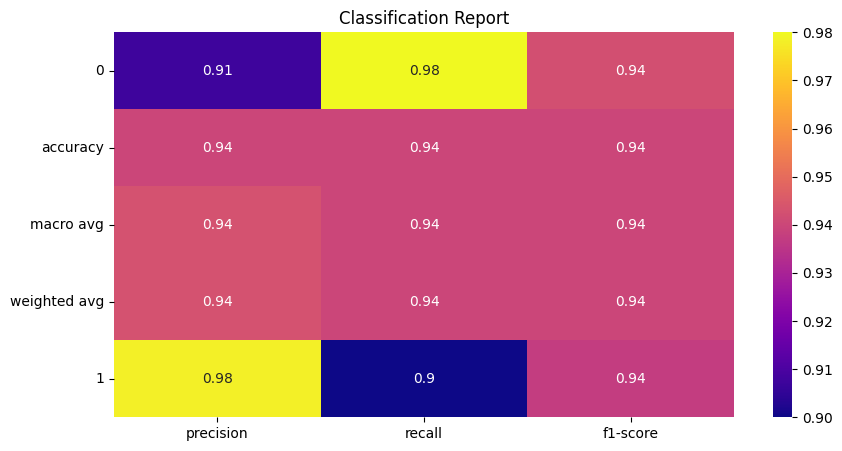

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.DataFrame(report).transpose()
df1 = df1.sort_values(by=['f1-score'], ascending=False)

# Plot the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(df1[['precision', 'recall', 'f1-score']], annot=True, cmap='plasma')
plt.title('Classification Report')
plt.show()

False Positives: 1
False Negatives: 5


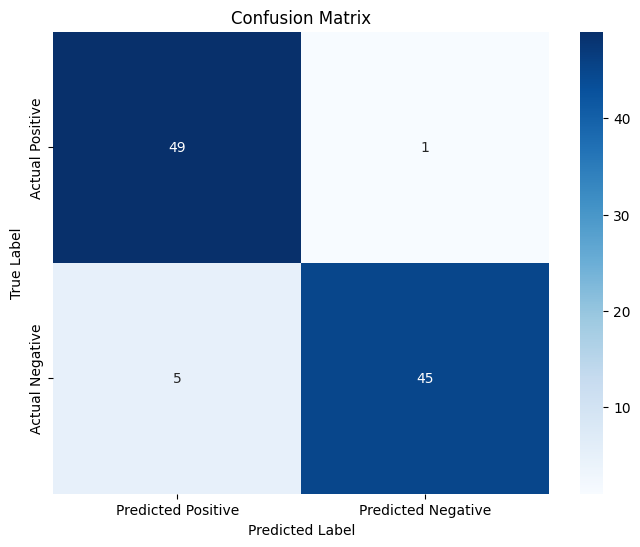

In [229]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

# Extract true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN)
tn, fp, fn, tp = cm.ravel()

# Calculate false positives and false negatives
false_positive = fp
false_negative = fn

print("False Positives:", false_positive)
print("False Negatives:", false_negative)
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

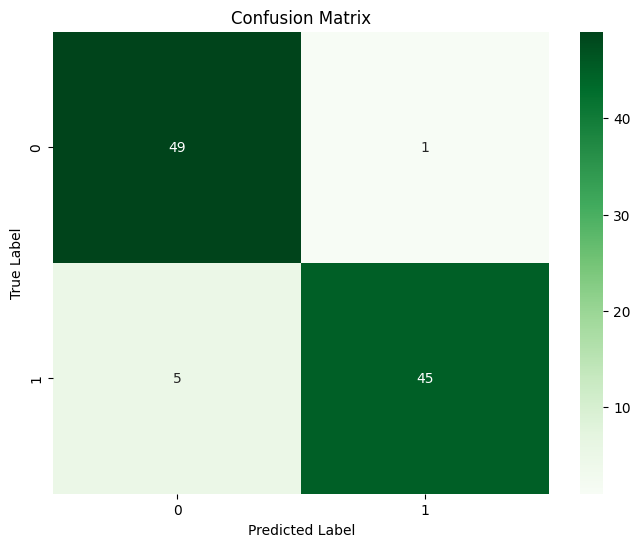

In [230]:
# Assuming y_true and y_pred are already defined as shown previously
import numpy as np
unique_labels = np.unique(np.concatenate((y_true, y_pred)))

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=unique_labels)

# Plot the confusion matrix as a heatmap with unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=unique_labels, 
            yticklabels=unique_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We need to know the false positives and false negetives for tuning the model

In [231]:
pos = df_balanced_sample[ df_balanced_sample['mistral_target'] == 1]
pos

,idx,commit_message,target,mistral_result,mistral_result_cleaned,mistral_target
234,3482,powerpc/oprofile: Handle events that raise an ...,0,\n'Yes',Yes,1
280,3486,Performance improvement to if_contains and mod...,1,\n'Yes',Yes,1
60,3157,Added Debian support. This code is another ro...,1,\n'Yes',Yes,1
237,2289,improve performance of list rendering,1,\n'Yes',Yes,1
57,2607,EasiOS v0.3.2 Eelphant: * Add window controll...,1,\n'Yes',Yes,1
290,2207,Merge pull request #8570 from qlyoung/revert-r...,1,\nYes. \n,Yes,1
322,3843,use array instead of int map for itemTags (#13...,1,\nYes. \n,Yes,1
328,4009,[PATCH] Reworked function 'get_best_weight()' ...,1,\n'Yes',Yes,1
107,2210,Performance improvements,1,\n'Yes',Yes,1
203,2519,Improve the performance to export layers,1,\n'Yes',Yes,1


In [232]:
fp = pos[pos['target'] == 0]
fp.to_csv('false_positive.csv', index=False)

In [233]:
pos = df_balanced_sample[ df_balanced_sample['mistral_target'] == 0]  #for false negetives
pos

,idx,commit_message,target,mistral_result,mistral_result_cleaned,mistral_target
272,2576,Merge trunk [ Albert Astals Cid ] * Focus the...,0,\n'No',No,0
259,3112,Notebookfixes (#166) * MAINT make performance...,0,\n'No',No,0
106,393,Add EfficientNetV2 XL model defs,0,\n'No'.,No,0
189,1148,Merge branch 'mips64-improvements',0,\n'No'.,No,0
59,1594,Figured out how to dynamically adjust memory w...,0,\n'No'.,No,0
316,1903,documenting algorithm for standard tibetan,0,\n'No',No,0
94,1457,ENH: Add initial cmake build script (#51) CMa...,0,\n'No'.,No,0
208,1054,fixed minor memory leaks,0,\n'No',No,0
288,1944,Improve spec tests.,0,\n'No'.,No,0
38,3721,I have renamed 'NewCoalescentLikelihood' as 'C...,0,\n'No'.,No,0


In [234]:
fn = pos[pos['target'] == 1]
fn.to_csv('false_negetive.csv', index=False)